# COGS 118B - Final Project

## Book Recommendation System

### Group members

- Natalia Abdulmawla
- Aarya Patel
- Brian Lee
- Holden Ly
- Yanxiong Chen

### Abstract

The goal of our project was to explore the book-crossing dataset and build a reccomendation system for books based on the dataset. The dataset contains a total of 8 different features, with 1,149,780 ratings of 271,379 books measured on a scale of 1 to 10 by 278,858 reviewers. To build this system we sought to use various unsupervised learning techniques such as k-means clustering and principal component analysis to find what optimally works with our dataset while exploring the dataset and find underlying patterns within the data. This allowed us to recommend books by using the similarities between user preferences. Subsequently we attempted to evaluate the performance of the algorithm. Through this project we aimed to demonstrate the challenges in providing personalized book recommendations based on a person's interests using the books and their given features. 

### Background

Recent decades has seen an an explosion of all kinds of content, from literature to music to fashion trends, particularly by the increasing ease of access to the internet. By the nature of the global marketplace the volume of options for a user to choose from can be overwhelming. This has let to people having to deal with the challenge of making informed decisions on the content they want to consume. This has led to the rise in the use of recommendation systems that personalize choices based on a user's preferences and behaviors to alleviate this burden placed on people <a name="rs"></a>[<sup>[2]</sup>](#rsnote). Recommendation systems have become far reaching in our digital lives due to their practical applications in fields such as e-commerce, entertainment, or social media in enhancing user experience and satisfaction <a name="icwww"></a>[<sup>[3]</sup>](#icwwwnote). In order to provide personalized choices these systems leverage machine learning algorithms to predict a user's preferences to provide recommendations. 

Research into recommendation systems have explored various approaches to address the challenge of providing the most accurate personalized recommendations to users. Collaborative filtering is one of the most popular techniques. By identifying patterns by examining the interactions between users and items, users with similar tastes are grouped together thus enabling personalized recommendations of items based on the preferences of a group of users. Another popular technique is content-based filtering, utilizing the characteristics of an item to identify and recommend items that align with a user's preferences. Machine learning techniques such as k-means clustering and principal component analysis, among many others, have also been of great use into building and improving recommendation systems by enabling researchers to identify meaningful patterns from large datasets.

Book recommendations are one application of these recommendation systems, frequently used by book-oriented platforms such as Goodreads with the goal to be to assist a user in discovering books that align with their preferences and interests. Subsequently, these platforms have accumulated large amounts of data related to user preferences and behaviors which are then used to continously improve the performance and accuracy of recommendation system they use in their platforms <a name="bx"></a>[<sup>[1]</sup>](#bxnote).

Our project of developing a basic personalized book recommendation system focuses on leveraging the Book-Crossing dataset, a collection of user ratings and book information. Compiled by Cai-Nicolas Ziegler of the Institute for Information Systems, the Book-Crossing dataset comprises 1,149,780 ratings (on a scale of 1-10 stars) of 271,379 books provided by 278,858 reviewers, making it a valuable dataset for exploring user preferences and behaviors. It provides a comprehensive view of user preferences towards different books, giving us a solid groundwork for the development of a recommendation system.

Through our project we seek to build upon the existing research by employing unsupervised learning techniques to uncover hidden patterns within the Book-Crossing dataset. By groping reviewers and books based on their ratings and other features, we seek to have a deeper understanding of user preferences towards books and their characteristics, along with a deeper understanding of the unsupervised learning techniques which are used in building a recommendation system and their real world applications. 

### Problem Statement

The goal of our project is to develop a book recommendation system using the Book-Crossing dataset. The dataset represents a large collection of user-book interactions, including ratings provided by users for various books. By utilizing the 1.1 million ratings of 271,379 books by 278,858 reviewers and applying various unsupervised learning techniques, we seek to create a personalized book recommendation system.

The challenge that comes in doing this is properly applying the techniques onto the vast amount of data available to us in the dataset. To overcome this challenge we first explore the data to identify patterns and similarities among the books, the reviewers, and their ratings. In doing a basic exploration we see how we must clean and preprocess the data, by handling missing values and outliers, and ensuring consistency in the data, making it easier to apply machine learning techniques on the data. This problem and the solution can be reproduced by applying the same methodology of data preprocessing, feature engineering, and model building to a similar dataset, enabling someone to create a similar recommendation system for a different domain such as music or e-commerce.


### Data

In order to build our recommendation system we needed to find a dataset with the appropriate information. We found a dataset from the following source, https://web.archive.org/web/20200511092532/http://www2.informatik.uni-freiburg.de/~cziegler/BX/. This consists of three different datasets:

**Books.csv** with 271379 observations and 5 features: a unique numerical identifier for each book under the column **'ISBN'**, the title of a book under the column **'Title'**, the author of a book under the column **'Author'**, the numerical year a book was published under the column **'Year'**, and the name of a publisher that a book is released under the column **'Publisher'**. Each observation represents a published book and some of the information which describes that book. 

**Ratings.csv** with 1149780 observations and 3 features: a unique numerical identifier for each reviewer which provides anonimity under the column **'User-ID'**, a nuique numerical identifier for each book being rated under the column **'ISBN'**, and the representation of the ratings given by reviewers to the books on a range of 1-10, under the column **'Rating'**. Each observation represents a rating given by a reviewer to a book. 

**Users.csv** with 278859 observations and 2 features: a unique identifier for each reviewer under the column **'User-ID'**, and the age of the reviewer under the column **'Age'**. Each observation represents a unique anonimized reviewer and their personal information.

Before being able to use the data we had to do a basic exploratory data analysis to see some information and patterns within the data. This allowed us to find out how we had to clean the data to make it usable. For example, in the Users dataset there were many missing ages for reviewers and outlier ages which were not logical, such as 130+ or under 5 years old. We handled these by replacing them with the mean age of the reviewers. We also did some filtering of the data which were not necessary and would affect our results or computation time, such as including only including ratings of books which are found in our books dataset. Other tasks we did to clean and preprocess the data include renaming columsn to make them easier to use, converting data types and encoding data, and dropping any duplicates. 

### Proposed solution

To develop a book recommendation system using the Book-Crossing dataset, we will employ unsupervised learning techniques such as k-means clustering and gaussian mixture models using libraries such as scikit-learn and scipy. This gives us a larger insight into the patterns in the data that we cannot see using simpler methods of visualizing the data. Should we discover that these techniques will not be the most appropriate to use in our data we will consider more traditional techniques used in the creation of a recommendation system such as content-based filtering or collaborative filtering. The approach of particular interest is collaborative filtering, allowing us to use the patterns in user-item interactions to identify reviewers with similar preferences and subsequently recommend items liked by those reviewers. This process is done by calculating user similarity through measures of similarity such as consine similarity. By using a similar methodology of exploring and preprocessing a similar dataset then applying the appropriate algorithms our solution is entirely reproducible by another person interested in developing a recommendation system.

## Exploratory Data Analysis

### Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from scipy.sparse import csr_matrix
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import PCA

### Reading Data

In [2]:
books = pd.read_csv("Books.csv", sep=";")
users = pd.read_csv("Users.csv", sep=";")
ratings = pd.read_csv("Ratings.csv", sep=";")

<ipython-input-2-361a5b60f0e0>:2: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  users = pd.read_csv("Users.csv", sep=";")


In [3]:
# Viewing the first few points of the books dataset, and its original shape
display(books.head())
books.shape

,ISBN,Title,Author,Year,Publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton & Company


(271379, 5)

In [4]:
# Viewing the first few points of the users dataset, and its original shape
display(users.head())
users.shape

,User-ID,Age
0,1,NaN
1,2,18
2,3,NaN
3,4,17
4,5,NaN


(278859, 2)

In [5]:
# Viewing the first few points of the ratings dataset, and its original shape
display(ratings.head())
ratings.shape

,User-ID,ISBN,Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


(1149780, 3)

### Cleaning data

In [6]:
# Rename 'User-ID' to 'UserID'
users = users.rename(columns={'User-ID': 'UserID'})

In [7]:
# Convert 'Ages' to numeric
users['Age'] = pd.to_numeric(users['Age'], errors='coerce')

# Calculate the mean, median, and standard deviation 
print("Mean Age: ", users['Age'].mean())
print("Median Age: ", users['Age'].median())
print("Standard Deviation of Age: ", users['Age'].std())

Mean Age:  34.72840724853575
Median Age:  32.0
Standard Deviation of Age:  14.408645139788613


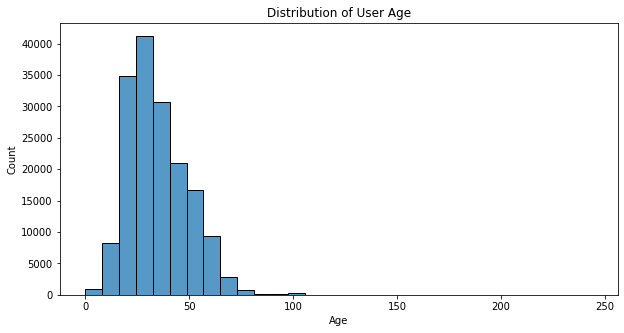

In [8]:
# Plot a histogram of 'Ages' to help understand the distribution of ages and find a logical age range 
plt.figure(figsize=(10,5))
sns.histplot(users['Age'], bins=30)
plt.title('Distribution of User Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

Looking at the plot, a reasonable range should be from 5 to 85

In [9]:
# Clean 'Age' by removing and replacing NaN values and outliers such as < 5 and > 85 with the mean age
users.loc[(users.Age > 85) | (users.Age < 5), 'Age'] = np.nan
users['Age'] = users['Age'].fillna(users['Age'].mean())

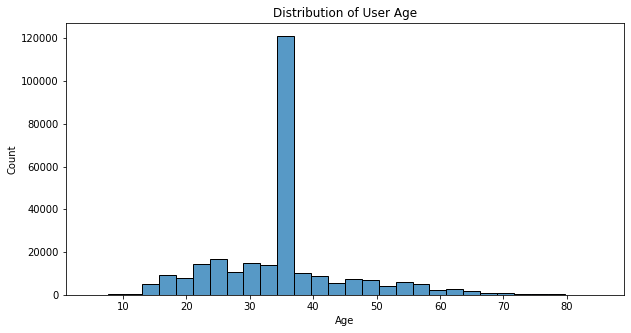

In [10]:
# Plot histogram of ages after cleaning values
plt.figure(figsize=(10,5))
sns.histplot(users['Age'], bins=30)
plt.title('Distribution of User Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

In [11]:
# Rename 'User-ID' to 'UserID'
ratings = ratings.rename(columns={'User-ID': 'UserID'})

In [12]:
display(ratings.head())
print(ratings.shape)

,UserID,ISBN,Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


(1149780, 3)


In [13]:
# Filter 'ratings' dataset to only include rows where 'ISBN' is also found in the 'ISBN' in 'books' df
ratings = ratings[ratings.ISBN.isin(books.ISBN)]
print (ratings.shape)

(1031175, 3)


This will clean the dataset from any values which won't be of use for the recommendation system and speed up the algorithm by even the smallest bit.

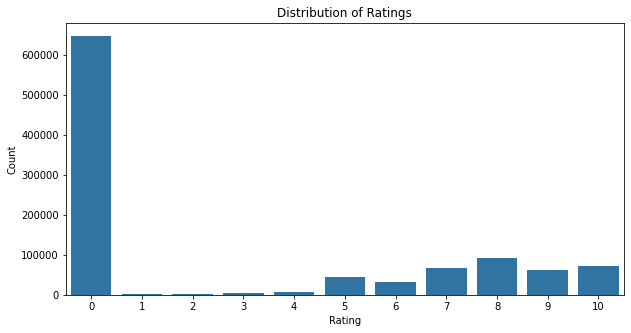

In [14]:
# Distribution of Ratings
plt.figure(figsize=(10,5))
sns.countplot(x='Rating', data=ratings)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

In [15]:
# Calculate mean rating and number of ratings for each book
book_ratings = ratings.groupby('ISBN')['Rating'].agg(['count', 'mean'])

# Rename the columns
book_ratings.rename(columns={'count': 'rating_count', 'mean': 'avg_rating'}, inplace=True)

# Merge this df with the 'books' DataFrame
books = books.merge(book_ratings, on='ISBN', how='left')

# Fill NaN values with 0
books[['avg_rating', 'rating_count']] = books[['avg_rating', 'rating_count']].fillna(0)

In [16]:
# Display top 10 books with the highest rating that have been rated more than 100 times
books.loc[books["rating_count"] > 100].sort_values(by="avg_rating", ascending=False).head(10)

,ISBN,Title,Author,Year,Publisher,rating_count,avg_rating
5432,0439064864,Harry Potter and the Chamber of Secrets (Book 2),J. K. Rowling,1999,Scholastic,170.0,6.611765
5431,0439139597,Harry Potter and the Goblet of Fire (Book 4),J. K. Rowling,2000,Scholastic,194.0,6.541237
3839,0439136350,Harry Potter and the Prisoner of Azkaban (Book 3),J. K. Rowling,1999,Scholastic,197.0,6.467005
2809,0590353403,Harry Potter and the Sorcerer's Stone (Book 1),J. K. Rowling,1998,Scholastic,168.0,6.363095
5506,043935806X,Harry Potter and the Order of the Phoenix (Boo...,J. K. Rowling,2003,Scholastic,334.0,5.571856
6330,0439136369,Harry Potter and the Prisoner of Azkaban (Book 3),J. K. Rowling,2001,Scholastic,226.0,5.345133
2232,0812550706,Ender's Game (Ender Wiggins Saga (Paperback)),Orson Scott Card,1994,Tor Books,195.0,5.302564
1150,0671027344,The Perks of Being a Wallflower,Stephen Chbosky,1999,MTV,103.0,5.194175
6933,0439139600,Harry Potter and the Goblet of Fire (Book 4),J. K. Rowling,2002,Scholastic Paperbacks,193.0,5.103627
3354,0345339681,The Hobbit : The Enchanting Prelude to The Lor...,J.R.R. TOLKIEN,1986,Del Rey,281.0,5.007117


In [17]:
# Display top 10 books with the most ratings that have been rated more than 100 times
books.loc[books["rating_count"] > 100].sort_values(by="rating_count", ascending=False).head(10)

,ISBN,Title,Author,Year,Publisher,rating_count,avg_rating
26,0971880107,Wild Animus,Rich Shapero,2004,Too Far,2502.0,1.019584
408,0316666343,The Lovely Bones: A Novel,Alice Sebold,2002,"Little, Brown",1295.0,4.468726
748,0385504209,The Da Vinci Code,Dan Brown,2003,Doubleday,883.0,4.652322
1105,0060928336,Divine Secrets of the Ya-Ya Sisterhood: A Novel,Rebecca Wells,1997,Perennial,732.0,3.448087
522,0312195516,The Red Tent (Bestselling Backlist),Anita Diamant,1998,Picador USA,723.0,4.334716
305,044023722X,A Painted House,John Grisham,2001,Dell Publishing Company,647.0,3.187017
356,0142001740,The Secret Life of Bees,Sue Monk Kidd,2003,Penguin Books,615.0,4.219512
1922,067976402X,Snow Falling on Cedars,David Guterson,1995,Vintage Books USA,614.0,3.255700
118,0671027360,Angels & Demons,Dan Brown,2001,Pocket Star,586.0,3.718430
706,0446672211,Where the Heart Is (Oprah's Book Club (Paperba...,Billie Letts,1998,Warner Books,585.0,4.105983


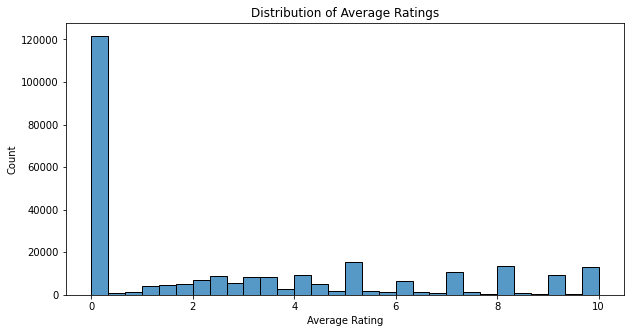

In [18]:
# Plot a histogram of average ratings
plt.figure(figsize=(10,5))
sns.histplot(books['avg_rating'], bins=30)
plt.title('Distribution of Average Ratings')
plt.xlabel('Average Rating')
plt.ylabel('Count')
plt.show()


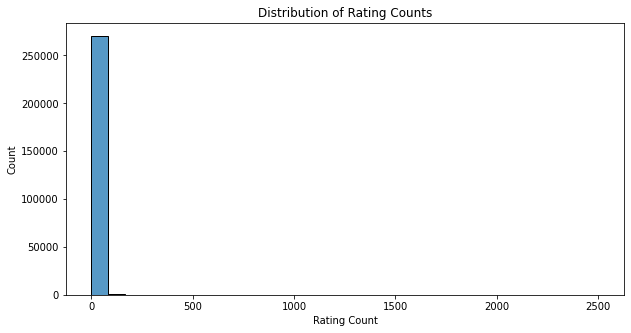

In [19]:
# Plot a histogram of rating counts
plt.figure(figsize=(10,5))
sns.histplot(books['rating_count'], bins=30)
plt.title('Distribution of Rating Counts')
plt.xlabel('Rating Count')
plt.ylabel('Count')
plt.show()


## Data preprocessing

In [20]:
# Get the ISBNs of books with more than 50 ratings
isbn_rating_count = books[books["rating_count"] > 50]["ISBN"]

# Filter the 'ratings' dataset to include only these ISBNs
filtered_ratings = ratings[ratings["ISBN"].isin(isbn_rating_count)]

# Drop duplicates
book_matrix = filtered_ratings.drop_duplicates()

# Display the new dataset
print(book_matrix)


         UserID        ISBN  Rating
0        276725  034545104X       0
2        276727  0446520802       0
8        276744  038550120X       7
10       276746  0425115801       0
11       276746  0449006522       0
...         ...         ...     ...
1149761  276704  0345386108       6
1149767  276704  0446353957       0
1149768  276704  0446605409       0
1149771  276704  0743211383       7
1149772  276704  080410526X       0

[231876 rows x 3 columns]


<ipython-input-21-5d1b527678fa>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Text'] = df['Title'] + " by " + df['Author'] + 'published by' + df['Publisher']
c:\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: Futu

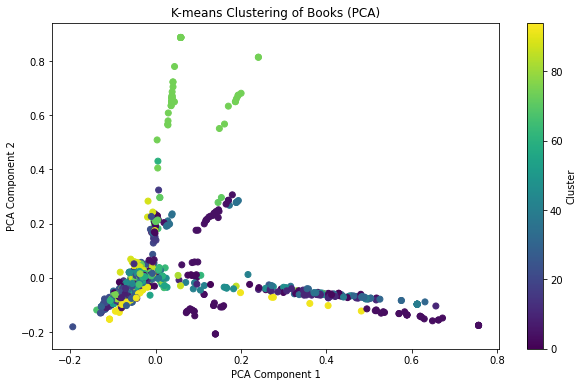

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import silhouette_score

df = books[books["rating_count"] > 50]

df['Text'] = df['Title'] + " by " + df['Author'] + 'published by' + df['Publisher']
tfidf_vectorizer = TfidfVectorizer(max_features=2000, stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(df['Text'])

silhouette_scores = []
for k in range(1, 20):
    kmeans = KMeans(n_clusters=k*5, random_state=42)
    cluster_labels = kmeans.fit_predict(tfidf_matrix)
    silhouette_scores.append(silhouette_score(tfidf_matrix, cluster_labels))

optimal_k = 5*(silhouette_scores.index(max(silhouette_scores))+1)
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(tfidf_matrix)

pca = PCA(n_components=2)
tfidf_matrix_pca = pca.fit_transform(tfidf_matrix.toarray())

plt.figure(figsize=(10, 6))
plt.scatter(tfidf_matrix_pca[:, 0], tfidf_matrix_pca[:, 1], c=cluster_labels)
plt.title('K-means Clustering of Books (PCA)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()

In [22]:
from sklearn.preprocessing import StandardScaler

# One-hot encodes all data instead of trying to use vector embeddings
new_df = books[books["rating_count"] > 50].drop_duplicates()
# df['Title'].value_counts()
# df['Author'].value_counts()
# df['Publisher'].value_counts()
df_encoded = pd.get_dummies(new_df, columns=['Title', 'Author', 'Publisher'])
X1 = df_encoded.drop(columns=["ISBN", 'rating_count']) # all numerical data input
X2 = StandardScaler().fit_transform(X1) # data input as standardized
gmm = GaussianMixture(n_components=10, random_state=777, covariance_type='diag').fit(X2)

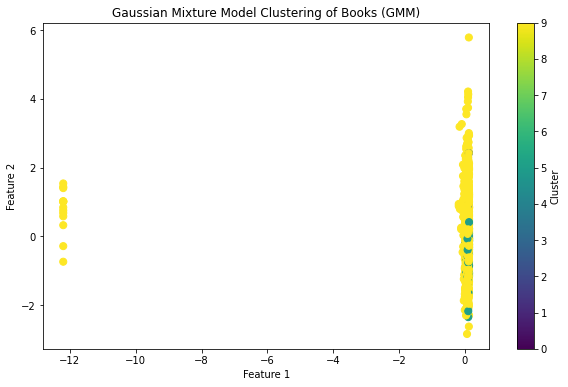

In [23]:
# Predict the cluster for each data point
Y_gmm = gmm.predict(X2)

# Visualize the clusters
plt.figure(figsize=(10, 6))
plt.scatter(X2[:, 0], X2[:, 1], c=Y_gmm, s=50)

plt.title('Gaussian Mixture Model Clustering of Books (GMM)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Cluster')
plt.show()

In [24]:
# Create a pivot table from book_matrix, turning the observations into 'UserID' and features into 'ISBN'
# With 'Rating' being the values in the matrix
book_matrix_pivot = book_matrix.pivot_table(index='UserID', columns='ISBN', values='Rating').fillna(0)

# Turn the pivot table into a compressed matrix to make it more efficient and less demanding to run
sparse_book_matrix = csr_matrix(book_matrix_pivot.values)

# Print the shape of the matrices to ensure the dimensions match
print(book_matrix_pivot.shape)
print(sparse_book_matrix.shape)

(42543, 2101)
(42543, 2101)


In [25]:
# Compute the cosine similarity matrix
user_similarity = cosine_similarity(sparse_book_matrix)

# Get the user IDs
user_ids = book_matrix_pivot.index

# Convert the cosine similarity matrix into a dataset
user_similarity_df = pd.DataFrame(user_similarity, index=user_ids, columns=user_ids)

# Define collaborative filtering system
def book_recommendation(user_id, n_books):
    # Get the similarity scores for the user
    similarity_scores = user_similarity_df[user_id]
    
    # Sort the scores in descending order
    sorted_scores = similarity_scores.sort_values(ascending=False)
    
    # Find the top n most similar users
    top_users = sorted_scores[1:n_books+1].index
    
    # Get the books rated by these users
    top_books = ratings[ratings['UserID'].isin(top_users)]['ISBN'].unique()
    
    # Exclude the books already rated by the user
    recommended_books = [book for book in top_books if book not in ratings[ratings['UserID'] == user_id]['ISBN'].values]
    
    return recommended_books[:n_books]

print(book_recommendation(276704, 5))

['039914370X', '3404146956', '3453021959', '3453023757', '3453210719']
